In [14]:
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.models import Sequential
from keras.layers import Input
import os
import seaborn as sns

In [15]:
def _readImage():
  folder = 'images'
  images = []
  label = []
  categories = ['cats', 'dogs']
  for p in categories:
    path = os.path.join(folder, p)
    for img in os.listdir(path):
      img_path = os.path.join(path, img)
      image = imread(img_path)
      gray_image = rgb2gray(image)
      resized_img = resize(gray_image, (120,120))
      images.append(resized_img.flatten())
      label.append(categories.index(p))
  return np.array(images), np.array(label)
x, y = _readImage()

In [16]:
def _readTestImage():
  folder = 'images'
  images = []
  label = []
  categories = ['cats', 'dogs']
  for p in categories:
    path = os.path.join(folder, p)
    for img in os.listdir(path):
      img_path = os.path.join(path, img)
      image = imread(img_path)
      gray_image = rgb2gray(image)
      resized_img = resize(gray_image, (120,120))
      images.append(resized_img.flatten())
      label.append(categories.index(p))
  return np.array(images), np.array(label)
x_test, y_test = _readTestImage()

In [17]:
def _split():
  global x_train, x_val, y_train, y_val
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=41)

_split()

In [18]:
def _createModel():
  model = Sequential([
      Input(shape=(14400,1)),
      Conv1D(kernel_size = 8, strides = 2, activation= 'relu', filters=32),
      MaxPooling1D(4),
      Conv1D(kernel_size = 8, strides = 1, activation= 'relu', filters=64),
      MaxPooling1D(4),
      Flatten(),
      Dense(activation = 'relu', units = 256),
      Dense(activation = 'sigmoid', units = 1)
  ])
  return model

In [19]:
model = _createModel()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 7197, 32)       │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1799, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1792, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 448, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28672)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     7,340,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,357,281 (28.07 MB)

 Trainable params: 7,357,281 (28.07 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
history = model.fit(x_train, y_train, epochs = 10 ,validation_data=(x_val, y_val))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 503ms/step - accuracy: 0.4271 - loss: 1.0914 - val_accuracy: 0.5833 - val_loss: 0.8711
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step - accuracy: 0.4549 - loss: 0.9887 - val_accuracy: 0.5833 - val_loss: 0.6961
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.5278 - loss: 0.6602 - val_accuracy: 0.4167 - val_loss: 0.8186
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.5521 - loss: 0.6620 - val_accuracy: 0.4167 - val_loss: 0.7480
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.6840 - loss: 0.6251 - val_accuracy: 0.2500 - val_loss: 0.7214
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.7847 - loss: 0.6028 - val_accuracy: 0.5000 - val_loss: 0.7319
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.8021 - loss: 0.5490 - val_accuracy: 0.4167 - val_loss: 0.7089
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.8611 - loss: 0.5066 - val_accuracy: 0.5000 - val_loss:

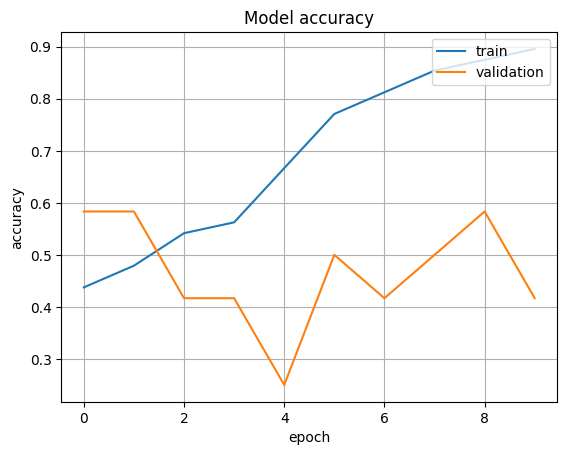

In [22]:
def _accuracy_by_model(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title('Model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='upper right')
    plt.grid(True)
_accuracy_by_model(history)

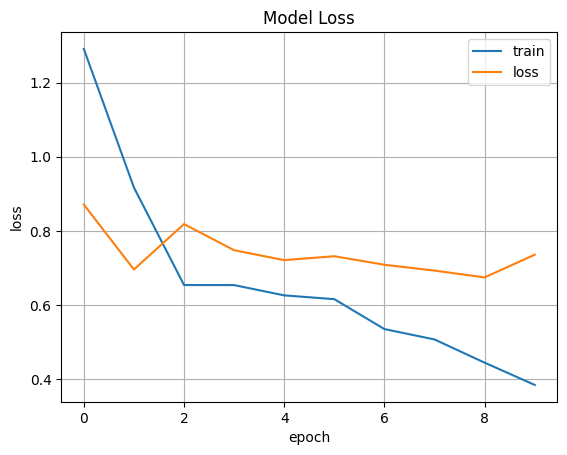

In [23]:
def _model_loss(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='loss')
    plt.title('Model Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.grid(True)
_model_loss(history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


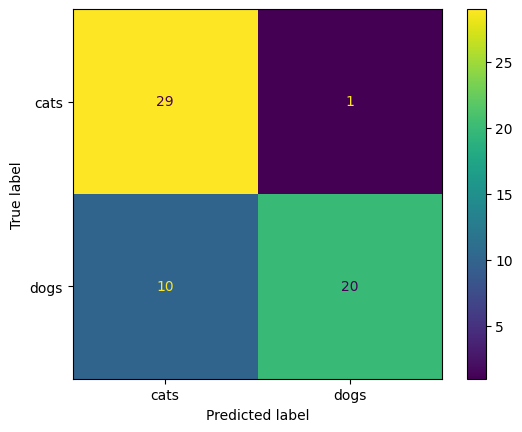

In [24]:
def _cm():
    y_pred = model.predict(x_test)
    y_test_list = y_test.tolist()

    if y_pred.ndim == 1 or y_pred.shape[1] == 1:
        y_pred = (y_pred > 0.5).astype(int).flatten()
    else:
        y_pred = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test, y_pred)

    categories = ['cats', 'dogs']
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
    disp.plot()
_cm()